In [3]:
from gensim.models import Word2Vec,KeyedVectors
import gensim.downloader as api

In [4]:
model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [5]:
model['king']

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [1]:
import pandas as pd
import numpy as np
import os
import gensim
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [6]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [7]:
story=[]

In [23]:
story.append("""Once upon a time, in a bustling city named Innovaria, there lived a young inventor named Elara. Elara had a peculiar talent for creating devices that no one had ever imagined. Her latest invention was a small, portable machine that could transform polluted air into fresh, breathable oxygen. Despite her brilliance, Elara was often misunderstood by the townsfolk, who were skeptical of her creations

One day, a mysterious traveler visited Innovaria. The traveler, cloaked in a dark green robe, spoke of a distant village named Thaliora that was suffering from a severe air pollution crisis. Curious and empathetic, Elara decided to visit Thaliora to test her invention and help its people.

The journey was long and arduous. Elara crossed dense forests, climbed treacherous mountains, and sailed through turbulent seas. Along the way, she encountered various challenges. In the forest, a group of mischievous monkeys stole her supplies, forcing her to devise clever traps to retrieve them. On the mountains, she befriended a solitary hermit who taught her the art of patience and resilience. At sea, a fierce storm tested her courage, but her determination kept her going.

When she finally arrived at Thaliora, Elara was shocked to see the extent of the pollution. The skies were gray, the rivers were blackened, and the air was thick with smog. The villagers, clad in makeshift masks, were struggling to breathe. Moved by their plight, Elara quickly set up her machine in the village square. As the machine began to hum and emit fresh air, the villagers gathered around in awe.

Within days, the air quality in Thaliora improved significantly. The villagers hailed Elara as a hero and thanked her for her kindness and ingenuity. News of her invention spread far and wide, attracting the attention of scientists and environmentalists from around the world.

Elara returned to Innovaria, not just as an inventor but as a symbol of hope and innovation. Her journey taught her that perseverance and empathy could overcome even the most daunting challenges. From that day on, she continued to create inventions that not only amazed but also made the world a better place.

""")

In [26]:
import string

In [27]:
corpus=story

In [28]:
print(corpus)

['Once upon a time, in a bustling city named Innovaria, there lived a young inventor named Elara. Elara had a peculiar talent for creating devices that no one had ever imagined. Her latest invention was a small, portable machine that could transform polluted air into fresh, breathable oxygen. Despite her brilliance, Elara was often misunderstood by the townsfolk, who were skeptical of her creations\n\nOne day, a mysterious traveler visited Innovaria. The traveler, cloaked in a dark green robe, spoke of a distant village named Thaliora that was suffering from a severe air pollution crisis. Curious and empathetic, Elara decided to visit Thaliora to test her invention and help its people.\n\nThe journey was long and arduous. Elara crossed dense forests, climbed treacherous mountains, and sailed through turbulent seas. Along the way, she encountered various challenges. In the forest, a group of mischievous monkeys stole her supplies, forcing her to devise clever traps to retrieve them. On 

In [31]:
raw_sent = sent_tokenize(corpus[0]) # Access the string within the list

In [32]:
raw_sent

['Once upon a time, in a bustling city named Innovaria, there lived a young inventor named Elara.',
 'Elara had a peculiar talent for creating devices that no one had ever imagined.',
 'Her latest invention was a small, portable machine that could transform polluted air into fresh, breathable oxygen.',
 'Despite her brilliance, Elara was often misunderstood by the townsfolk, who were skeptical of her creations\n\nOne day, a mysterious traveler visited Innovaria.',
 'The traveler, cloaked in a dark green robe, spoke of a distant village named Thaliora that was suffering from a severe air pollution crisis.',
 'Curious and empathetic, Elara decided to visit Thaliora to test her invention and help its people.',
 'The journey was long and arduous.',
 'Elara crossed dense forests, climbed treacherous mountains, and sailed through turbulent seas.',
 'Along the way, she encountered various challenges.',
 'In the forest, a group of mischievous monkeys stole her supplies, forcing her to devise c

In [33]:
for i in raw_sent:
    print(simple_preprocess(i))

['once', 'upon', 'time', 'in', 'bustling', 'city', 'named', 'innovaria', 'there', 'lived', 'young', 'inventor', 'named', 'elara']
['elara', 'had', 'peculiar', 'talent', 'for', 'creating', 'devices', 'that', 'no', 'one', 'had', 'ever', 'imagined']
['her', 'latest', 'invention', 'was', 'small', 'portable', 'machine', 'that', 'could', 'transform', 'polluted', 'air', 'into', 'fresh', 'breathable', 'oxygen']
['despite', 'her', 'brilliance', 'elara', 'was', 'often', 'misunderstood', 'by', 'the', 'townsfolk', 'who', 'were', 'skeptical', 'of', 'her', 'creations', 'one', 'day', 'mysterious', 'traveler', 'visited', 'innovaria']
['the', 'traveler', 'cloaked', 'in', 'dark', 'green', 'robe', 'spoke', 'of', 'distant', 'village', 'named', 'thaliora', 'that', 'was', 'suffering', 'from', 'severe', 'air', 'pollution', 'crisis']
['curious', 'and', 'empathetic', 'elara', 'decided', 'to', 'visit', 'thaliora', 'to', 'test', 'her', 'invention', 'and', 'help', 'its', 'people']
['the', 'journey', 'was', 'long'

In [54]:
story=[]
# Access the string within the list using corpus[0]
raw_sent=sent_tokenize(corpus[0])
for sent in raw_sent:
    story.append(simple_preprocess(sent))

In [55]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string


In [56]:

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
for i in corpus:
    words = word_tokenize(i)
    for word in words:
        print(word)

Once
upon
a
time
,
in
a
bustling
city
named
Innovaria
,
there
lived
a
young
inventor
named
Elara
.
Elara
had
a
peculiar
talent
for
creating
devices
that
no
one
had
ever
imagined
.
Her
latest
invention
was
a
small
,
portable
machine
that
could
transform
polluted
air
into
fresh
,
breathable
oxygen
.
Despite
her
brilliance
,
Elara
was
often
misunderstood
by
the
townsfolk
,
who
were
skeptical
of
her
creations
One
day
,
a
mysterious
traveler
visited
Innovaria
.
The
traveler
,
cloaked
in
a
dark
green
robe
,
spoke
of
a
distant
village
named
Thaliora
that
was
suffering
from
a
severe
air
pollution
crisis
.
Curious
and
empathetic
,
Elara
decided
to
visit
Thaliora
to
test
her
invention
and
help
its
people
.
The
journey
was
long
and
arduous
.
Elara
crossed
dense
forests
,
climbed
treacherous
mountains
,
and
sailed
through
turbulent
seas
.
Along
the
way
,
she
encountered
various
challenges
.
In
the
forest
,
a
group
of
mischievous
monkeys
stole
her
supplies
,
forcing
her
to
devise
clever
traps
to
re

In [58]:
print(story)

[['once', 'upon', 'time', 'in', 'bustling', 'city', 'named', 'innovaria', 'there', 'lived', 'young', 'inventor', 'named', 'elara'], ['elara', 'had', 'peculiar', 'talent', 'for', 'creating', 'devices', 'that', 'no', 'one', 'had', 'ever', 'imagined'], ['her', 'latest', 'invention', 'was', 'small', 'portable', 'machine', 'that', 'could', 'transform', 'polluted', 'air', 'into', 'fresh', 'breathable', 'oxygen'], ['despite', 'her', 'brilliance', 'elara', 'was', 'often', 'misunderstood', 'by', 'the', 'townsfolk', 'who', 'were', 'skeptical', 'of', 'her', 'creations', 'one', 'day', 'mysterious', 'traveler', 'visited', 'innovaria'], ['the', 'traveler', 'cloaked', 'in', 'dark', 'green', 'robe', 'spoke', 'of', 'distant', 'village', 'named', 'thaliora', 'that', 'was', 'suffering', 'from', 'severe', 'air', 'pollution', 'crisis'], ['curious', 'and', 'empathetic', 'elara', 'decided', 'to', 'visit', 'thaliora', 'to', 'test', 'her', 'invention', 'and', 'help', 'its', 'people'], ['the', 'journey', 'was',

In [64]:
custom_model=gensim.models.Word2Vec(window=10,min_count=5,vector_size=150)

In [65]:
custom_model.build_vocab(story)

In [66]:
custom_model.corpus_count

23

In [67]:
custom_model.epochs

5

In [68]:
custom_model.corpus_total_words

338

In [69]:
custom_model.min_count

5

In [70]:
custom_model.train(story, total_examples=custom_model.corpus_count, epochs=5)

(50, 1690)

In [71]:
# Get the vocabulary
vocab = list(custom_model.wv.key_to_index.keys())
print("Vocabulary size:", len(vocab))
print("First 10 words:", vocab[:10])


Vocabulary size: 10
First 10 words: ['the', 'her', 'and', 'to', 'elara', 'of', 'in', 'was', 'that', 'air']


In [72]:
similar_words = custom_model.wv.most_similar('air', topn=5)
print("Words most similar to 'air':", similar_words)


Words most similar to 'air': [('in', 0.15116161108016968), ('the', 0.0712772086262703), ('that', 0.0019192667677998543), ('and', -0.0029178576078265905), ('to', -0.01481159869581461)]


In [73]:
similar_words = custom_model.wv.most_similar('elara', topn=5)
print("Words most similar to 'elara':", similar_words)


Words most similar to 'elara': [('to', 0.18158863484859467), ('was', 0.14260977506637573), ('her', 0.1419278383255005), ('in', 0.05845395103096962), ('the', 0.022051796317100525)]


In [74]:
similarity = custom_model.wv.similarity('elara', 'air')
print("Similarity between 'Elara' and 'air':", similarity)


Similarity between 'Elara' and 'inventor': -0.052104082


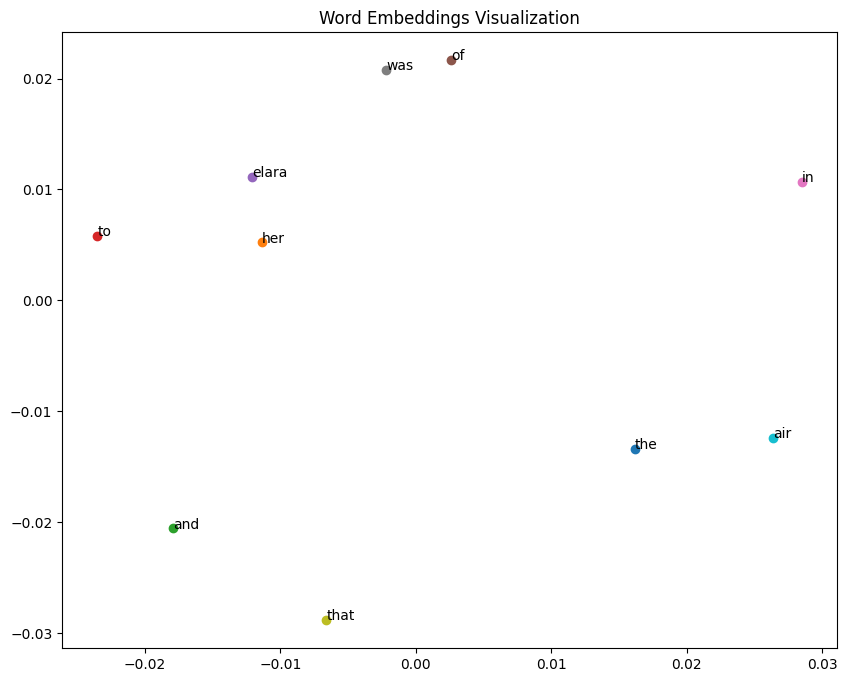

In [75]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality of vectors
words = list(custom_model.wv.key_to_index.keys())[:50]  # First 50 words
word_vectors = [custom_model.wv[word] for word in words]

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Plot the words
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

plt.title("Word Embeddings Visualization")
plt.show()


In [76]:
from sklearn.cluster import KMeans
import numpy as np

# Prepare data for clustering
word_vectors = np.array([custom_model.wv[word] for word in vocab])
num_clusters = 5  # Choose the number of clusters

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(word_vectors)

# Group words by cluster
clusters = {i: [] for i in range(num_clusters)}
for word, cluster_id in zip(vocab, kmeans.labels_):
    clusters[cluster_id].append(word)

# Print clusters
for cluster_id, words in clusters.items():
    print(f"Cluster {cluster_id}: {words}")


Cluster 0: ['to']
Cluster 1: ['the', 'in', 'was']
Cluster 2: ['her', 'elara', 'of']
Cluster 3: ['air']
Cluster 4: ['and', 'that']
